# **Gemini API Demo**


**Google Gemini** is an advanced tool that we can leverage to interact, ask questions, and receive intelligent responses on the gemini platform. While it offers extensive functionality, it doesn't allow direct integration of Google Gemini into our code.

In this demo, we'll explore how to utilize the gemini API to bring the capabilities of a large language model (LLM) into our own applications. This approach allows us to harness the power of Google Gemini's technology programmatically, making it a flexible and valuable addition to our projects.

## **Installing the Gemini SDK**

To use the Gemini API in Python, we will use the official Gemini SDK for Python. This SDK simplifies the process of interacting with the API in your Python applications.
- [Gemini API SDK](https://pypi.org/project/google-generativeai/)

In [11]:
# Install or upgrade the Gemini Python library.
# The `--upgrade` flag ensures you have the latest version.
# The `--quiet` flag suppresses unnecessary output during installation.
# The `!` (or `%` for line magics) is used in Colab or Jupyter notebooks to execute shell commands.
# In this case, it runs the `pip` command to manage Python packages.

!pip install --upgrade --quiet google-generativeai

## **Get and Setup Your API Key**

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel.

In [12]:
# Import the `userdata` module from `google.colab` to access user-specific data.
from google.colab import userdata

# Get the Gemini API key from user data and store it in the `GEMINI_API_KEY` variable.
# The key is expected to be stored under the key 'GEMINI_API_KEY'.
# We use type hinting to specify that the variable should hold a string value.
GEMINI_API_KEY: str = userdata.get('GEMINI_API_KEY')

# Check if the API key was successfully retrieved.
if GEMINI_API_KEY:
  # If the key is found, print a success message.
  print("API key fetched successfully!")
else:
  # If the key is not found, print an error message and instructions for the user.
  print("API key not found. Please set the 'GEMINI_API_KEY' user data.")

API key fetched successfully!


## **Configure the Gemini SDK**

Now that we have installed the Gemini SDK and obtained an API key, the next step is to configure the SDK to use the key. This setup ensures that our code can authenticate with gemini's servers and make API requests.


### **Why Configure?**
Configuring the SDK with your API key:

1. Authenticates your application with gemini's services.
2. Allows you to send requests and receive responses securely.
3. Simplifies API usage in your Python scripts or notebooks.

[Gemini API Docs](https://ai.google.dev/gemini-api/docs)

In [13]:
# Import the genai module for API interaction
import google.generativeai as genai

# Configure it with your api key
genai.configure(api_key=GEMINI_API_KEY)

In [14]:
# check all available methods in the genai module
dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

## **Select an Configure Gemini Model**

Gemini offers several models with varying capabilities and pricing. Selecting the right model depends on your use case and budget. In this section, we'll discuss model selection.

- [Available models](https://ai.google.dev/gemini-api/docs/models/gemini)

To minimize costs while still achieving good results, we'll use **gemini-1.5-flash**, which offers excellent performance at a lower price.

In [15]:
# get all available models from gemini
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [16]:
# Import the `GenerativeModel` class from the Google Generative AI library.
# This class is used to define and interact with specific generative models.
from google.generativeai.generative_models import GenerativeModel

# Instantiate a generative model object using the "gemini-1.5-flash" model.
# This model represents a specific version of Google's Gemini language model,
# optimized for speed and performance in generating responses.
model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

## **Run your first prompt**


### **Make a Request**

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [17]:
# list all available methods for the model
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_async_client',
 '_client',
 '_generation_config',
 '_get_tools_lib',
 '_model_name',
 '_prepare_request',
 '_safety_settings',
 '_system_instruction',
 '_tool_config',
 '_tools',
 'cached_content',
 'count_tokens',
 'count_tokens_async',
 'from_cached_content',
 'generate_content',
 'generate_content_async',
 'model_name',
 'start_chat']

In [18]:
# Import the `GenerateContentResponse` class from Google's Generative AI library.
# This class is used to type hint the response object returned by the `generate_content` method.
from google.generativeai.types.generation_types import GenerateContentResponse

# Generate content using the generative model.
# The `generate_content` method sends a prompt to the model and returns a structured response.
response: GenerateContentResponse = model.generate_content(
    "Explain the basics of machine learning in simple terms. Respond in Markdown format."
)

### **Parse the Response**

In [19]:
# Import the 'display' function from the 'IPython.display' module.
# This function is used to display various types of content in Jupyter notebooks.
from IPython.display import display
display(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "## Machine Learning: Teaching Computers to Learn\n\nMachine learning is a type of artificial intelligence (AI) where computers learn from data without being explicitly programmed. Instead of giving the computer a set of rules to follow, we give it data and let it figure out the rules itself.  Think of it like teaching a child: instead of listing every single type of dog, you show them many pictures of dogs and let them identify the common features.\n\nHere's a breakdown of the basics:\n\n**1. Data:**  Machine learning algorithms need data to learn from. This data can be anything from images and text to numbers and sensor readings. The more data, the better the learning, usually.\n\n**2. Algorithm:** This is the set of instructions that the computer follows t

In [20]:
display(response.candidates)

[content {
  parts {
    text: "## Machine Learning: Teaching Computers to Learn\n\nMachine learning is a type of artificial intelligence (AI) where computers learn from data without being explicitly programmed. Instead of giving the computer a set of rules to follow, we give it data and let it figure out the rules itself.  Think of it like teaching a child: instead of listing every single type of dog, you show them many pictures of dogs and let them identify the common features.\n\nHere\'s a breakdown of the basics:\n\n**1. Data:**  Machine learning algorithms need data to learn from. This data can be anything from images and text to numbers and sensor readings. The more data, the better the learning, usually.\n\n**2. Algorithm:** This is the set of instructions that the computer follows to learn from the data.  Different algorithms are suited for different tasks. Some common types include:\n\n* **Supervised Learning:** The algorithm learns from labeled data (data where the correct an

### **Displaying the Response**

You can use the Markdown library to display the response in a well-structured format, ensuring that the content is easily readable and properly formatted. This is particularly useful when presenting information that includes headings, lists, code blocks, links, and other Markdown features.

In [23]:
# Import the Markdown class from the IPython.display module
# This is used to render Markdown content in the notebook output
from IPython.display import Markdown

In [24]:
display(Markdown(response.text))

Hello Umardraz Arshad!  How can I help you today?


# **Assignment 03 /AI201**

## **Use images in your prompt**

Here you will download an image from a URL and pass that image in our prompt.

- Here i copy the link of image that shows the relation of AI, Ml , DL and CNN.
- I just copy the link adress from the chrome of it and paste here and then access it as shown below
- Our program reaf this image and save it into his memory and learn from it. and hence we can train it by this image as done there.

In [6]:
!curl -o image.jpg "https://www.frontiersin.org/files/Articles/992541/fpsyg-14-992541-HTML/image_m/fpsyg-14-992541-g001.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97478  100 97478    0     0  83140      0  0:00:01  0:00:01 --:--:-- 83172


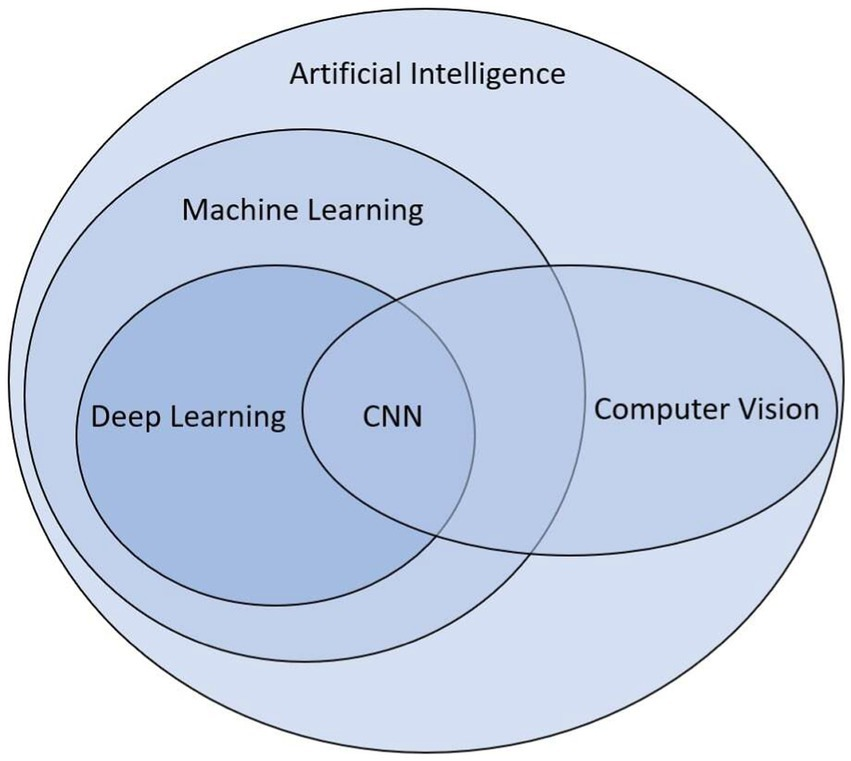

In [8]:
# Display the downloaded image
import PIL.Image
img = PIL.Image.open('image.jpg')
display(img)

In [9]:
# Write a prompt and store it in some variable
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [21]:
response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)

```json
{
  "description": "This image is a Venn diagram illustrating the relationships between various fields of artificial intelligence.  It shows how Deep Learning, CNN (Convolutional Neural Network), and Computer Vision are subsets of Machine Learning, which in turn is a subset of Artificial Intelligence. The diagram visually represents the hierarchical and overlapping nature of these AI concepts.",
  "features": [
    "Venn diagram format",
    "Illustrates Artificial Intelligence",
    "Illustrates Machine Learning",
    "Illustrates Deep Learning",
    "Illustrates Convolutional Neural Network (CNN)",
    "Illustrates Computer Vision",
    "Shows hierarchical relationships between concepts",
    "Shows overlapping areas indicating shared characteristics"
  ]
}
```


## **Have a Chat**

By default, a generative AI model is **stateless**—it does not retain any memory of previous interactions. This means it cannot recall information or context from earlier messages in the conversation unless explicitly provided.

To illustrate this, let's look at the following example:


In [25]:
response: GenerateContentResponse = model.generate_content(
    "Hye, I am Umardraz Arshad"
)
display(Markdown(response.text))

Hello Umardraz Arshad!  How can I help you today?


### As you seen above i give the prompt as my name. Now we try to check test the model it saves my memory and it can show my name or not.

In [27]:
response: GenerateContentResponse = model.generate_content(
    "Hye, What is my name"
)
display(Markdown(response.text))

I do not know your name.  I have no access to personal information about you unless you explicitly provide it to me.


### As yous see i was give a prompt of my name buT After ask my name from the model it says i do not know my your name. It means it do not save into memory or memory we are not created yet. So we create a memory first and then we will check it again after give or ask name to check its memory.

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

### here we created a history that save our memory and it will show us after asking and when we conversate it will remember our past info and it will give answers according to it.

In [28]:
# rather than generating a response with the model we can start a chat with it
from google.generativeai import ChatSession

# start a new chat witht he model with empty history
chat: ChatSession = model.start_chat(history=[])

In [29]:
# Send a message to the chat and it will have the conversation stored by default
response = chat.send_message("Hye, I am Umardraz Arshad")
display(Markdown(response.text))

Hello Umardraz Arshad!  It's nice to meet you. How can I help you today?


In [30]:
response: GenerateContentResponse = chat.send_message("In one sentence, explain how a computer works to a young child.")
display(Markdown(response.text))

A computer follows instructions, like a recipe, to do things, showing you the results on a screen.


In [31]:
response: GenerateContentResponse = chat.send_message("Hye, What is my name")
display(Markdown(response.text))

Your name is Umardraz Arshad.


### As you see above cell it shown my name after asking it means we have created history successfully.

In [32]:
# We can check the chat history too
print(chat.history)

[parts {
  text: "Hye, I am Umardraz Arshad"
}
role: "user"
, parts {
  text: "Hello Umardraz Arshad!  It\'s nice to meet you. How can I help you today?\n"
}
role: "model"
, parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer follows instructions, like a recipe, to do things, showing you the results on a screen.\n"
}
role: "model"
, parts {
  text: "Hye, What is my name"
}
role: "user"
, parts {
  text: "Your name is Umardraz Arshad.\n"
}
role: "model"
]


## **Set the Parameters (Globaly)**

Every prompt you send to the model includes parameters that control how the model generates responses. Use a `genai.GenerationConfig` to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

You can set the `generation_config` when creating the model. This will set the model parameters at the global level

# Temperature
**Definition:** Controls the randomness of the response, ranging from 0 to 1.  
**Purpose:**  
Lower values (e.g., 0.2) make responses more deterministic and focused.
Higher values (e.g., 0.8) make responses more creative.
**Example:**          Use a low temperature for factual queries and a high temperature for creative tasks.

In [33]:
# Define a model and also include some parameters
model: GenerativeModel = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=20,
        temperature=0.7,
    ))

In [34]:
response: GenerateContentResponse = model.generate_content(
    "Explain the basics of machine learning in simple terms. Respond in Markdown format."
    )
display(Markdown(response.text))

# Machine Learning: Teaching Computers to Learn

Machine learning (ML) is a type of artificial intelligence

In [35]:
response: GenerateContentResponse = model.generate_content(
    "Explain the basics of generative AI in simple terms. Respond in Markdown format."
    )
display(Markdown(response.text))

# Generative AI:  Making things from scratch

Generative AI is like a super-powered

## **Set the Parameters (Individualy)**

you can set the generation_config on an individual call to generate_content. Any values set there override values on the model constructor.

# Tokens
## we can control our output to set the limits of tokens

In [ ]:
response: GenerateContentResponse = model.generate_content(
    "Explain the basics of machine learning in simple terms. Respond in Markdown format.",
    generation_config=genai.GenerationConfig(
        max_output_tokens=200
    )
  )
display(Markdown(response.text))

## **References and Documentation**

- [Gemini API SDK](https://pypi.org/project/google-generativeai/)
- [Google API Docs](https://ai.google.dev/gemini-api/docs)
- [Get an API key](https://aistudio.google.com/app/apikey)
- [Gemini Available models](https://ai.google.dev/gemini-api/docs/models/gemini)


---